In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('50_startups.csv')
print(dataset.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [3]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [4]:
dataset.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [8]:
from sklearn.preprocessing import LabelEncoder

In [10]:
dataset['State'] = LabelEncoder().fit_transform(dataset['State'])
c = dataset.corr()
print(c)

                 R&D Spend  Administration  Marketing Spend     State  \
R&D Spend         1.000000        0.241955         0.724248  0.104685   
Administration    0.241955        1.000000        -0.032154  0.011847   
Marketing Spend   0.724248       -0.032154         1.000000  0.077670   
State             0.104685        0.011847         0.077670  1.000000   
Profit            0.972900        0.200717         0.747766  0.101796   

                   Profit  
R&D Spend        0.972900  
Administration   0.200717  
Marketing Spend  0.747766  
State            0.101796  
Profit           1.000000  


### OR

In [11]:
dataset_enc = pd.get_dummies(dataset, drop_first=True)
c = dataset_enc.corr()
print(c)

                 R&D Spend  Administration  Marketing Spend     State  \
R&D Spend         1.000000        0.241955         0.724248  0.104685   
Administration    0.241955        1.000000        -0.032154  0.011847   
Marketing Spend   0.724248       -0.032154         1.000000  0.077670   
State             0.104685        0.011847         0.077670  1.000000   
Profit            0.972900        0.200717         0.747766  0.101796   

                   Profit  
R&D Spend        0.972900  
Administration   0.200717  
Marketing Spend  0.747766  
State            0.101796  
Profit           1.000000  


In [13]:
import seaborn as sns

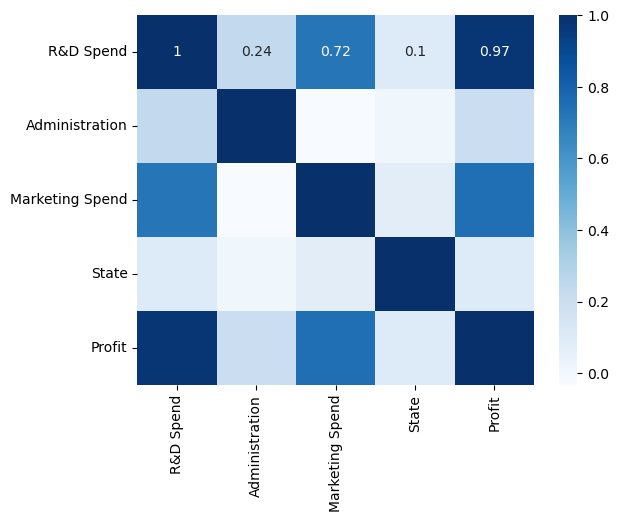

In [14]:
sns.heatmap(c, annot=True, cmap='Blues')
plt.show()

d:\Downloads\anacodasoft\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


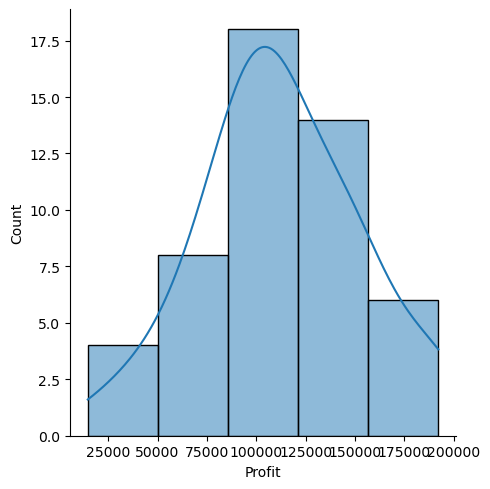

In [17]:
sns.displot(dataset['Profit'], bins=5, kde=True)
plt.show()

d:\Downloads\anacodasoft\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Downloads\anacodasoft\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Downloads\anacodasoft\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Downloads\anacodasoft\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

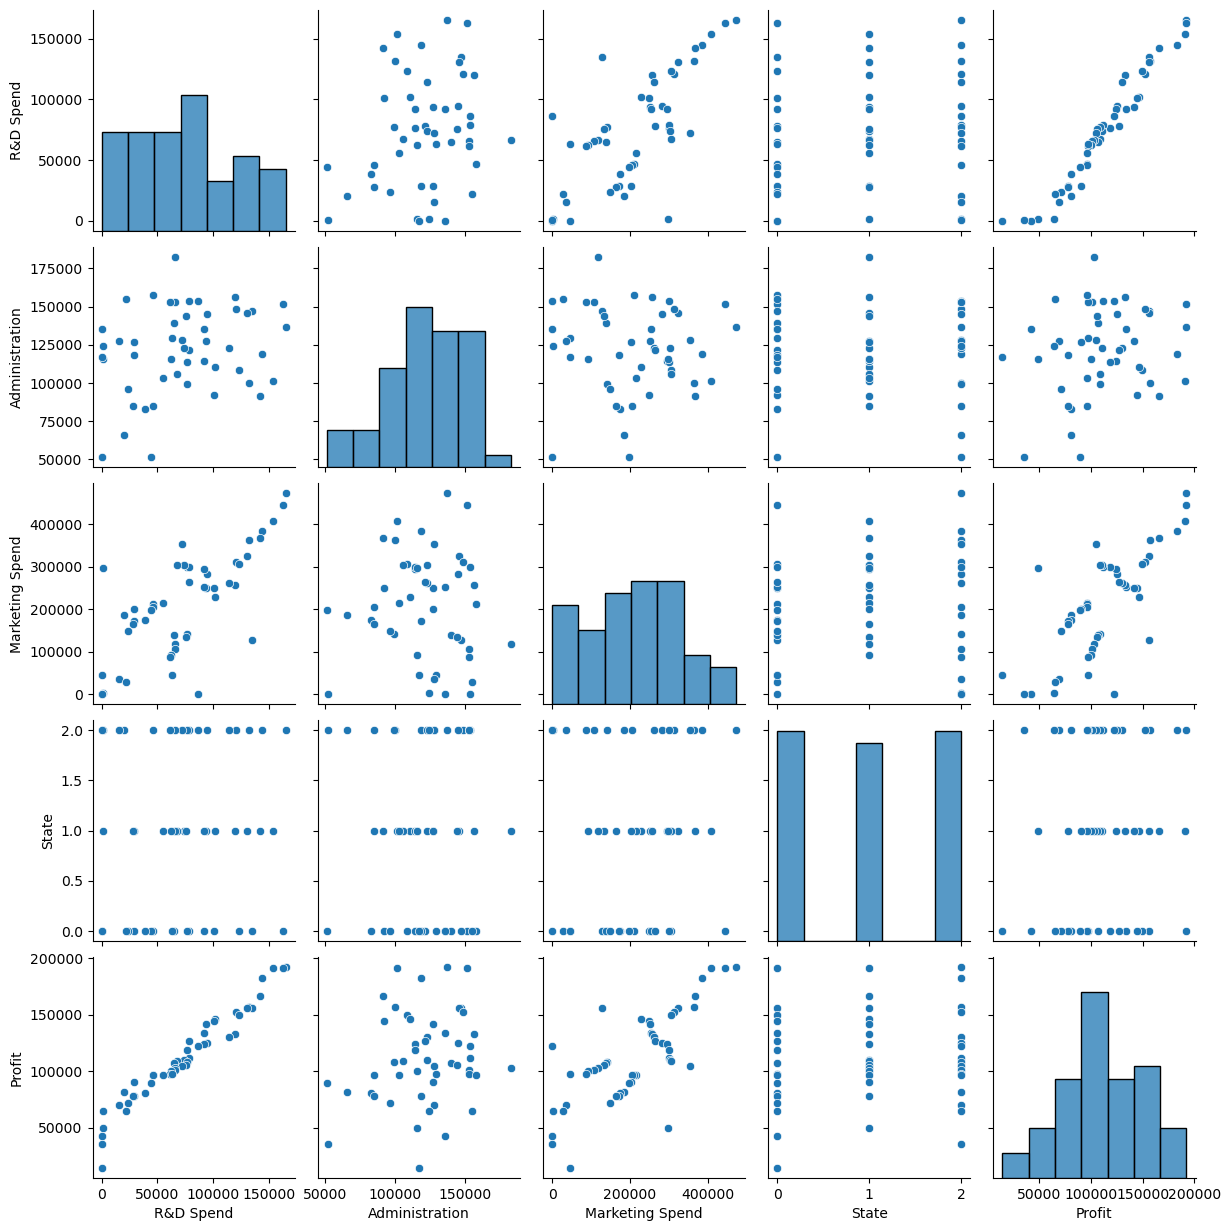

In [18]:
sns.pairplot(dataset)
plt.show()

In [19]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [20]:
le= LabelEncoder()
x[:, 3] = le.fit_transform(x[:, 3])
x1 = pd.DataFrame(x)
x1.head()

,0,1,2,3
0,165349.20,136897.80,471784.10,2.0
1,162597.70,151377.59,443898.53,0.0
2,153441.51,101145.55,407934.54,1.0
3,144372.41,118671.85,383199.62,2.0
4,142107.34,91391.77,366168.42,1.0


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7, test_size=0.3)

In [23]:
x_train

array([[2.8663760e+04, 1.2705621e+05, 2.0112682e+05, 1.0000000e+00],
       [2.7892920e+04, 8.4710770e+04, 1.6447071e+05, 1.0000000e+00],
       [1.0002300e+03, 1.2415304e+05, 1.9039300e+03, 2.0000000e+00],
       [1.3029813e+05, 1.4553006e+05, 3.2387668e+05, 1.0000000e+00],
       [1.6534920e+05, 1.3689780e+05, 4.7178410e+05, 2.0000000e+00],
       [7.8389470e+04, 1.5377343e+05, 2.9973729e+05, 2.0000000e+00],
       [7.7044010e+04, 9.9281340e+04, 1.4057481e+05, 2.0000000e+00],
       [4.4069950e+04, 5.1283140e+04, 1.9702942e+05, 0.0000000e+00],
       [7.2107600e+04, 1.2786455e+05, 3.5318381e+05, 2.0000000e+00],
       [1.3461546e+05, 1.4719887e+05, 1.2771682e+05, 0.0000000e+00],
       [2.8754330e+04, 1.1854605e+05, 1.7279567e+05, 0.0000000e+00],
       [1.1452361e+05, 1.2261684e+05, 2.6177623e+05, 2.0000000e+00],
       [1.0067196e+05, 9.1790610e+04, 2.4974455e+05, 0.0000000e+00],
       [1.3154600e+03, 1.1581621e+05, 2.9711446e+05, 1.0000000e+00],
       [1.2054252e+05, 1.4871895e+

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression()
model.fit(x_train,y_train)
print('Model has been trained succesfully')

Model has been trained succesfully


In [26]:
y_pred = model.predict(x_test)

In [27]:
y_pred

array([130539.73033856, 114485.09402488, 110214.71787584, 101761.93280652,
        70728.83323444,  87029.15309688,  84376.8231342 , 149447.11648192,
       126817.92074126,  45923.84749904, 129501.46912179,  61429.12590732,
        92522.86738166, 110969.60477001,  52980.1082367 ])

In [28]:
training_ms = model.score(x_train, y_train)
print('Model performance on training data: ', training_ms)
testing_ms = model.score(x_test,y_test)
print('Model performance on testing data: ', testing_ms)

Model performance on training data:  0.9505142750220245
Model performance on testing data:  0.9254773889432913


In [29]:
from sklearn.metrics import r2_score

In [30]:
r2_s = r2_score(y_pred, y_test)
print('R2Score of model: ', r2_s*100)

R2Score of model:  92.66913800064873


In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
mse = mean_squared_error(y_pred, y_test)
print('MSE is: ', mse*100)

MSE is:  6493911505.505887


In [33]:
from sklearn.metrics import mean_absolute_error

In [34]:
mae = mean_absolute_error(y_pred, y_test)
print('MAE is: ', mae*100)

MAE is:  653410.3220990631
